<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/assignment_220812_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C1_성민지_Big Data 일일 과제물 : Support Vector Machine (SVM)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,822 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #데이터 분할
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [4]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/유방암.csv', encoding = 'euc-kr')

print(df_raw.shape)
df_raw.head()

(320, 31)


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [5]:
df_raw.loc[df_raw['diagnosis'] == '양성', 'diagnosis'] = 1
df_raw.loc[df_raw['diagnosis'] == '음성', 'diagnosis'] = 0

In [6]:
df_raw['diagnosis'] = df_raw['diagnosis'].astype(int)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    int64  
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [8]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [9]:
df_raw_x = df_raw.drop ('diagnosis', axis =1, inplace = False)
df_raw_y = df_raw['diagnosis']

In [10]:
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [11]:
df_raw_y.head()

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

Support Vector Machine 분류를 진행할 때 연속형 설명변수들에 대해 반드시 거쳐야 할 과정은 Scaling이다.

In [13]:
v_feature_name = df_raw_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [14]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled,
                                                       test_size = 0.4,
                                                       random_state = 1234)

df_train_y, df_test_y = train_test_split(df_raw_y, 
                                         test_size = 0.4, 
                                         random_state =1234)

print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
test data X size : (128, 30)
train data Y size : (192,)
test data Y size : (128,)


In [15]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.961


train과 test 데이터에 대해 각각 99.5%, 96.1%의 모델 설명력을 보여준다.

### **모델 파라미터 변경 : C (규제에 대한 강도)**

In [17]:
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2,2)]
#para_c = [0.1 * c for c in range(1,10)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state =1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [18]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.964,0.906
2,1.00,0.995,0.961
3,10.00,1.000,0.961


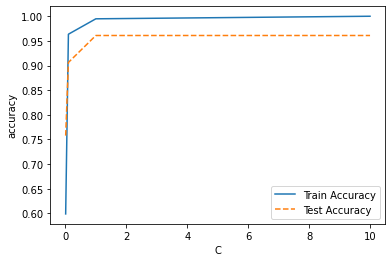

In [19]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

C가 0 ~ 1 사이일 때 모델의 성능이 급격하게 변하다가, 이후 성능에 변화가 없다. 모델의 성능이 변하는 구간에서 파라미터 튜닝을 한번 더 구체적으로 확인해볼 필요가 있어보인다.

In [20]:
train_accuracy = []; test_accuracy = []
para_c = [0.1 * c for c in range(1,10)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state =1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [21]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.964,0.906
1,0.2,0.969,0.930
2,0.3,0.974,0.930
3,0.4,0.979,0.938
4,0.5,0.984,0.930
5,0.6,0.995,0.938
6,0.7,0.995,0.945
7,0.8,0.995,0.953
8,0.9,0.995,0.953


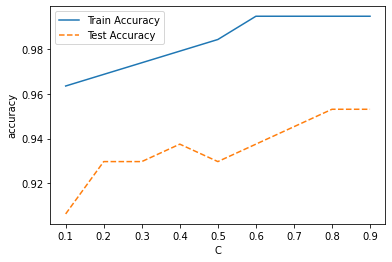

In [22]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

- C가 커짐에 따라 모델의 성능이 꾸준히 증가하는 것을 볼 수 있다.
- testscore가 0.891, trainscore가 0.885를 가지는 **C = 0.7**을 선택한다.

### **모델 파라미터 변경 : Gamma (훈련 샘플이 미치는 영향의 범위)**

In [51]:
train_accuracy = []; test_accuracy = []
para_gamma = [0.1 * gammma for gammma in range(1,3)]

for v_gamma in para_gamma :
    svm = SVC(gamma = v_gamma, C = 0.7, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

In [52]:
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.995,0.922
1,0.2,1.000,0.898
2,0.3,1.000,0.867
3,0.4,1.000,0.867
4,0.5,1.000,0.836


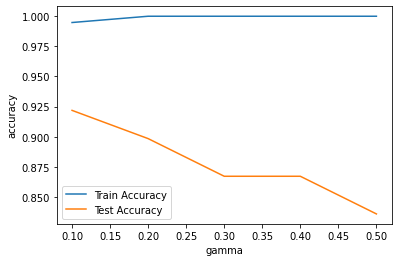

In [54]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()

- TestScore가 0.922이고 TestScore가 0.995인 **gamma = 0.1**를 선택한다.

### **결론 도출 : 최종 모델 선택**

In [55]:
svc_final = SVC(gamma = 0.1,
                C = 0.7,
                random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

print('Accuracy on training set : {:.3f}'.format(svc_final.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(svc_final.score(df_scaled_test_x, df_test_y)))

print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set : 0.995
Accuracy on test set : 0.922
Confusion matrix : 
[[91  6]
 [ 4 27]]
              precision    recall  f1-score   support

           0      0.958     0.938     0.948        97
           1      0.818     0.871     0.844        31

    accuracy                          0.922       128
   macro avg      0.888     0.905     0.896       128
weighted avg      0.924     0.922     0.923       128



- 해당 모델은 train과 test 데이터에 대해 각각 99.5%, 92.2%의 모델 설명력을 갖는다.
- 1에 대한 precision이 0.818로, 양성으로 예측한 값 중 실제 양성인 비율이 높아 분류가 잘 된 것으로 해석할 수 있다.
- 1에 대한 recall이 0.871로, 양성인 값 중 실제 양성으로 예측된 값의 비율이 높아 분류가 잘 된 것으로 해석할 수 있다.
- 1에 대한 f1-score이 0.844로, 모델의 전체적인 성능이 양호한 것으로 판단된다.